In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd /content
!curl -L -o Yolov8_Segmentation_Modified_Dataset.zip "https://github.com/Aashutoshh01/Yolov8_Image_Segmentation/releases/download/Dataset/Yolov8_Segmentation_Modified_Dataset.zip"
!unzip Yolov8_Segmentation_Modified_Dataset.zip
!rm Yolov8_Segmentation_Modified_Dataset.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  117M  100  117M    0     0  8002k      0  0:00:15  0:00:15 --:--:-- 8652k
Archive:  Yolov8_Segmentation_Modified_Dataset.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/Image_10_jpg.rf.3b01983dbac2eca95b01bdc21b59399b.jpg  
 extracting: test/images/Image_10_jpg.rf.734cd81370d79ecff97abd98572e8b79.jpg  
 extracting: test/images/Image_10_jpg.rf.8a16f77d961d3867d046be33c60b6105.jpg  
 extracting: test/images/Image_10_jpg.rf.c3b8328023a78dc6d63bba5b98791a71.jpg  
 extracting: test/images/Image_10_jpg.rf.da85960b06baee93ee0bbf03feee1ce1.jpg  
 extracting: test/images/Image_10_jpg.rf.e89183dbbb7e5cb0ae6e40a6

In [6]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/data.yaml epochs=25 batch=16 imgsz=640 save=true

100% 22.8M/22.8M [00:00<00:00, 39.8MB/s]
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

In [7]:
!ls runs/segment/train/

args.yaml			 MaskR_curve.png      train_batch2.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg     val_batch1_labels.jpg
labels.jpg			 train_batch1170.jpg  val_batch1_pred.jpg
MaskF1_curve.png		 train_batch1171.jpg  val_batch2_labels.jpg
MaskP_curve.png			 train_batch1172.jpg  val_batch2_pred.jpg
MaskPR_curve.png		 train_batch1.jpg     weights



image 1/153 /content/test/images/Image_10_jpg.rf.3b01983dbac2eca95b01bdc21b59399b.jpg: 640x640 1 Coeloseris, 20.9ms
image 2/153 /content/test/images/Image_10_jpg.rf.734cd81370d79ecff97abd98572e8b79.jpg: 640x640 1 Acanthastrea, 22.1ms
image 3/153 /content/test/images/Image_10_jpg.rf.8a16f77d961d3867d046be33c60b6105.jpg: 640x640 1 Psammocora, 20.9ms
image 4/153 /content/test/images/Image_10_jpg.rf.c3b8328023a78dc6d63bba5b98791a71.jpg: 640x640 1 Stylophora, 20.9ms
image 5/153 /content/test/images/Image_10_jpg.rf.da85960b06baee93ee0bbf03feee1ce1.jpg: 640x640 1 Favites, 20.9ms
image 6/153 /content/test/images/Image_10_jpg.rf.e89183dbbb7e5cb0ae6e40a6be1204bb.jpg: 640x640 1 Acropora, 20.1ms
image 7/153 /content/test/images/Image_11_jpg.rf.10e792c7f094812ab73320c4426830c2.jpg: 640x640 1 Acropora, 16.7ms
image 8/153 /content/test/images/Image_11_jpg.rf.1a925dbf6541917c9d6ecf9941e95654.jpg: 640x640 1 Stylophora, 16.7ms
image 9/153 /content/test/images/Image_11_jpg.rf.6a79d5014fadd41a98d651f0d2d

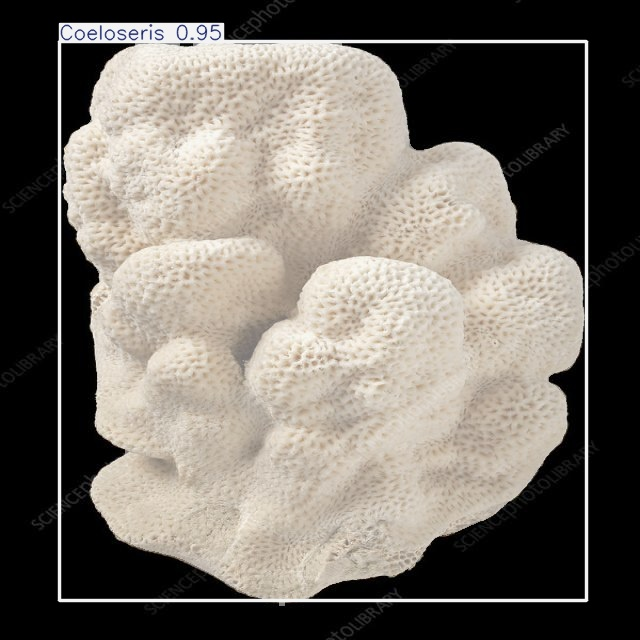

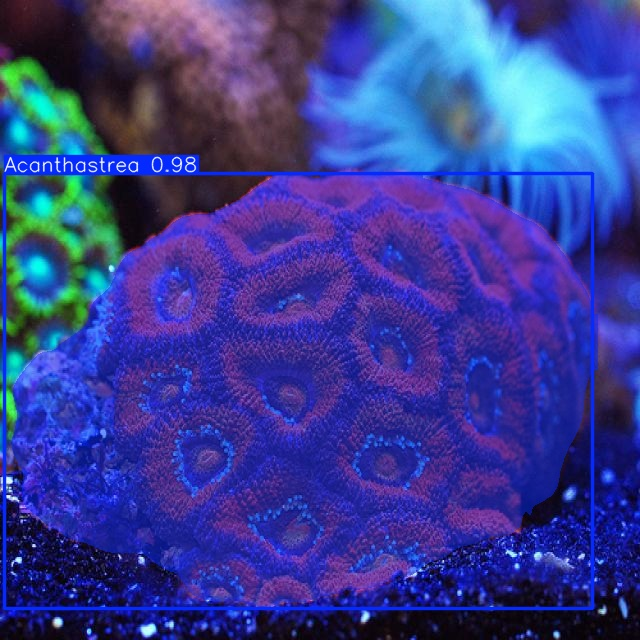

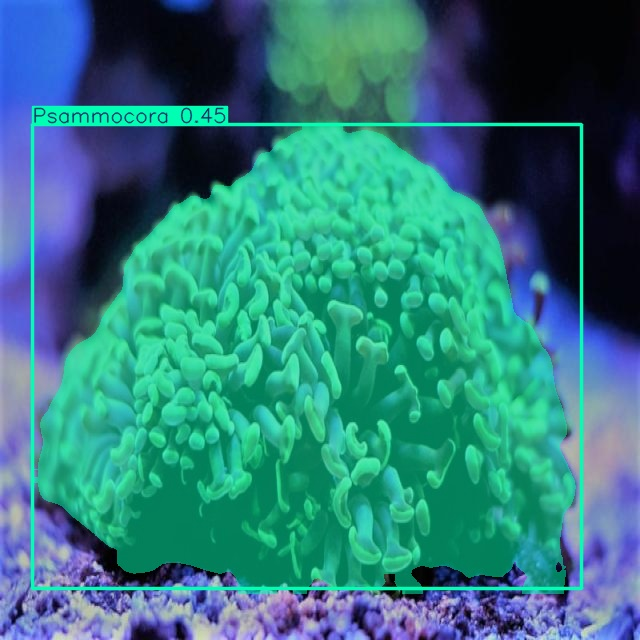

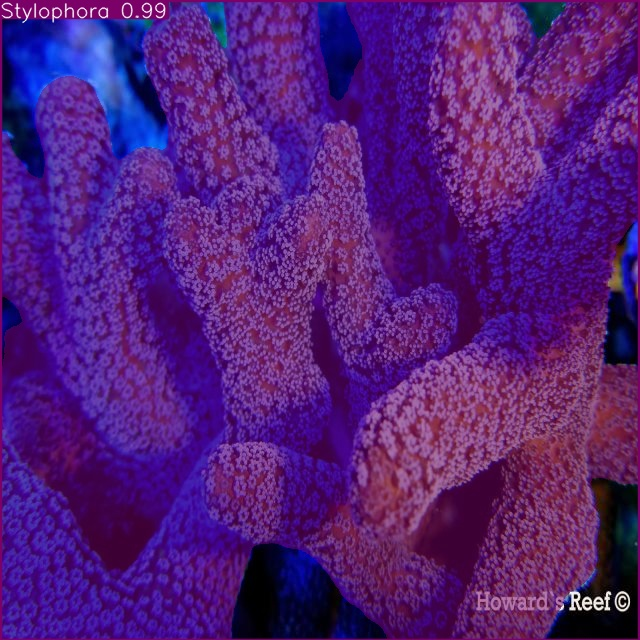

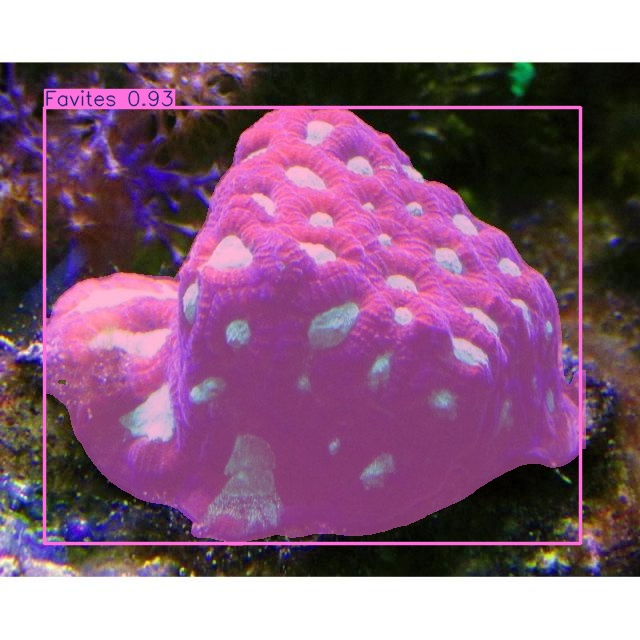

In [8]:
model = YOLO("runs/segment/train/weights/best.pt")

test_images_dir = "/content/test/images"
image_files = sorted(os.listdir(test_images_dir))[:5]

results = model.predict(source=test_images_dir, save=True, save_txt=False, conf=0.25, max_det=1, imgsz=640)

pred_dir = "runs/segment/predict"
predicted_images = sorted(os.listdir(pred_dir))[:5]

for img_name in predicted_images:
    display(Image(filename=os.path.join(pred_dir, img_name), width=600))

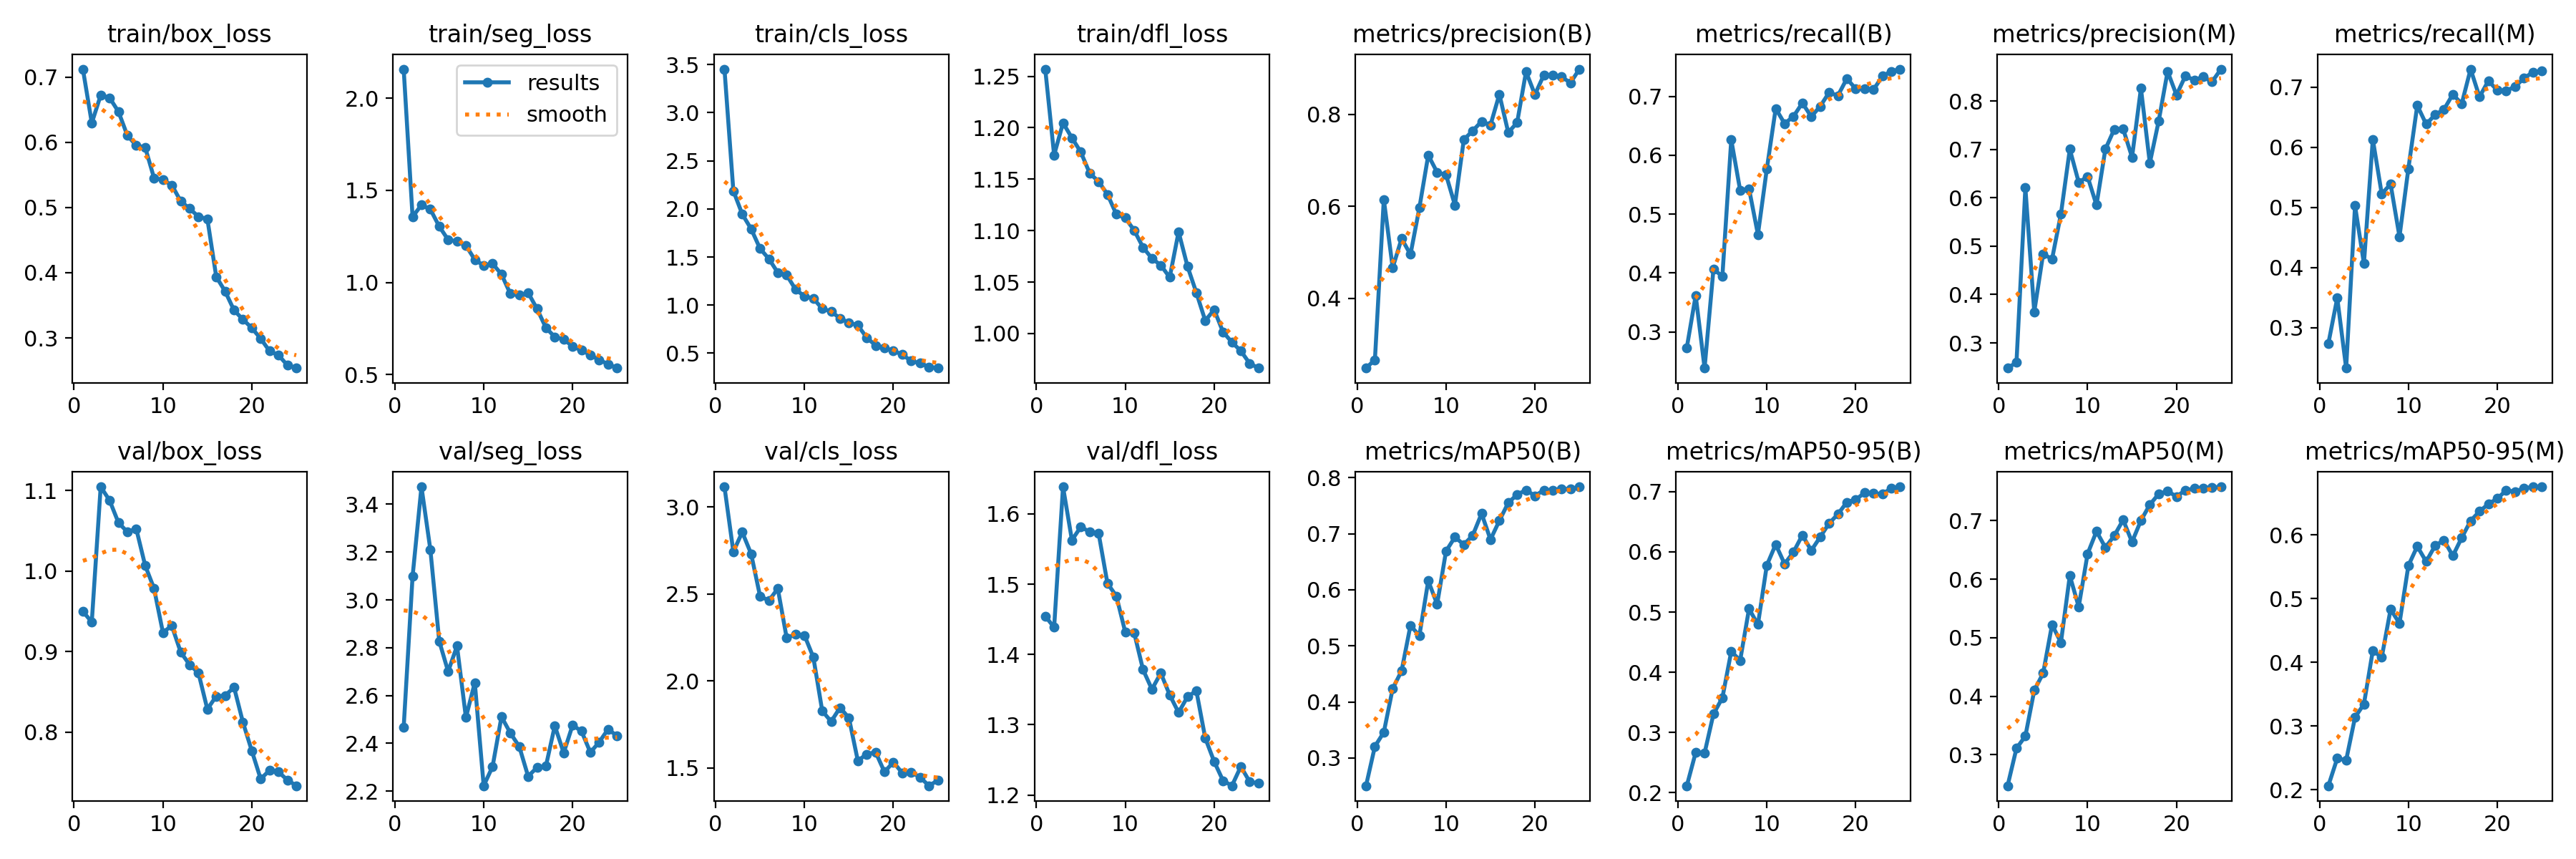

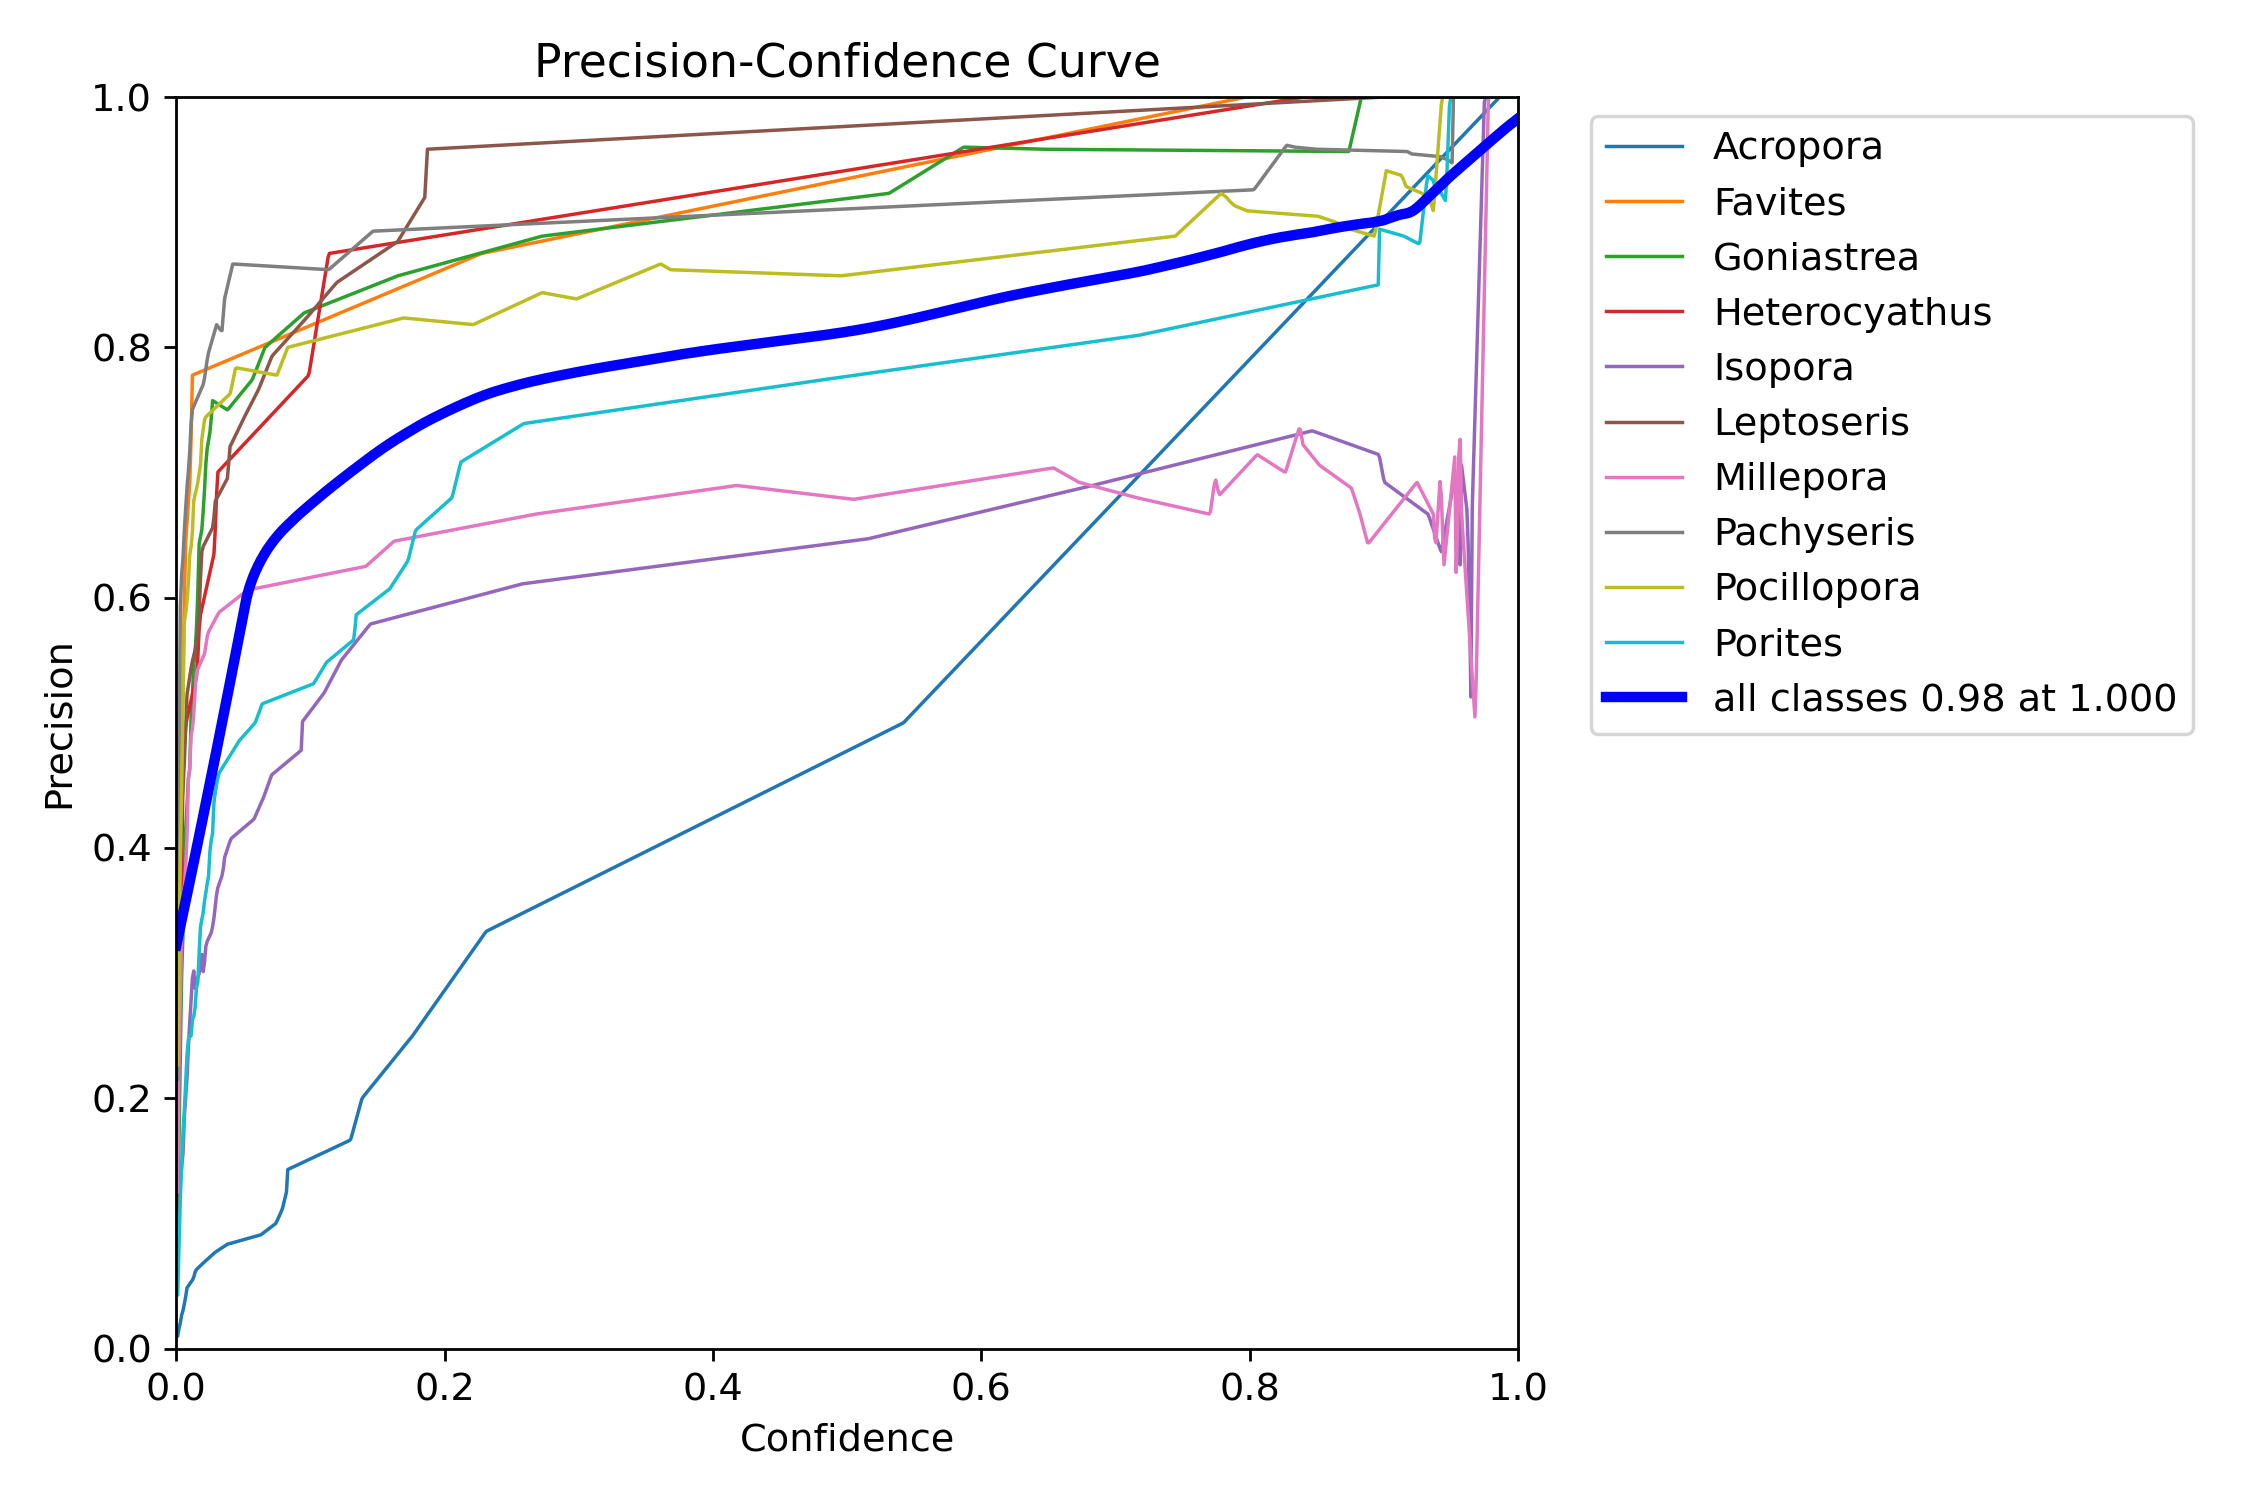

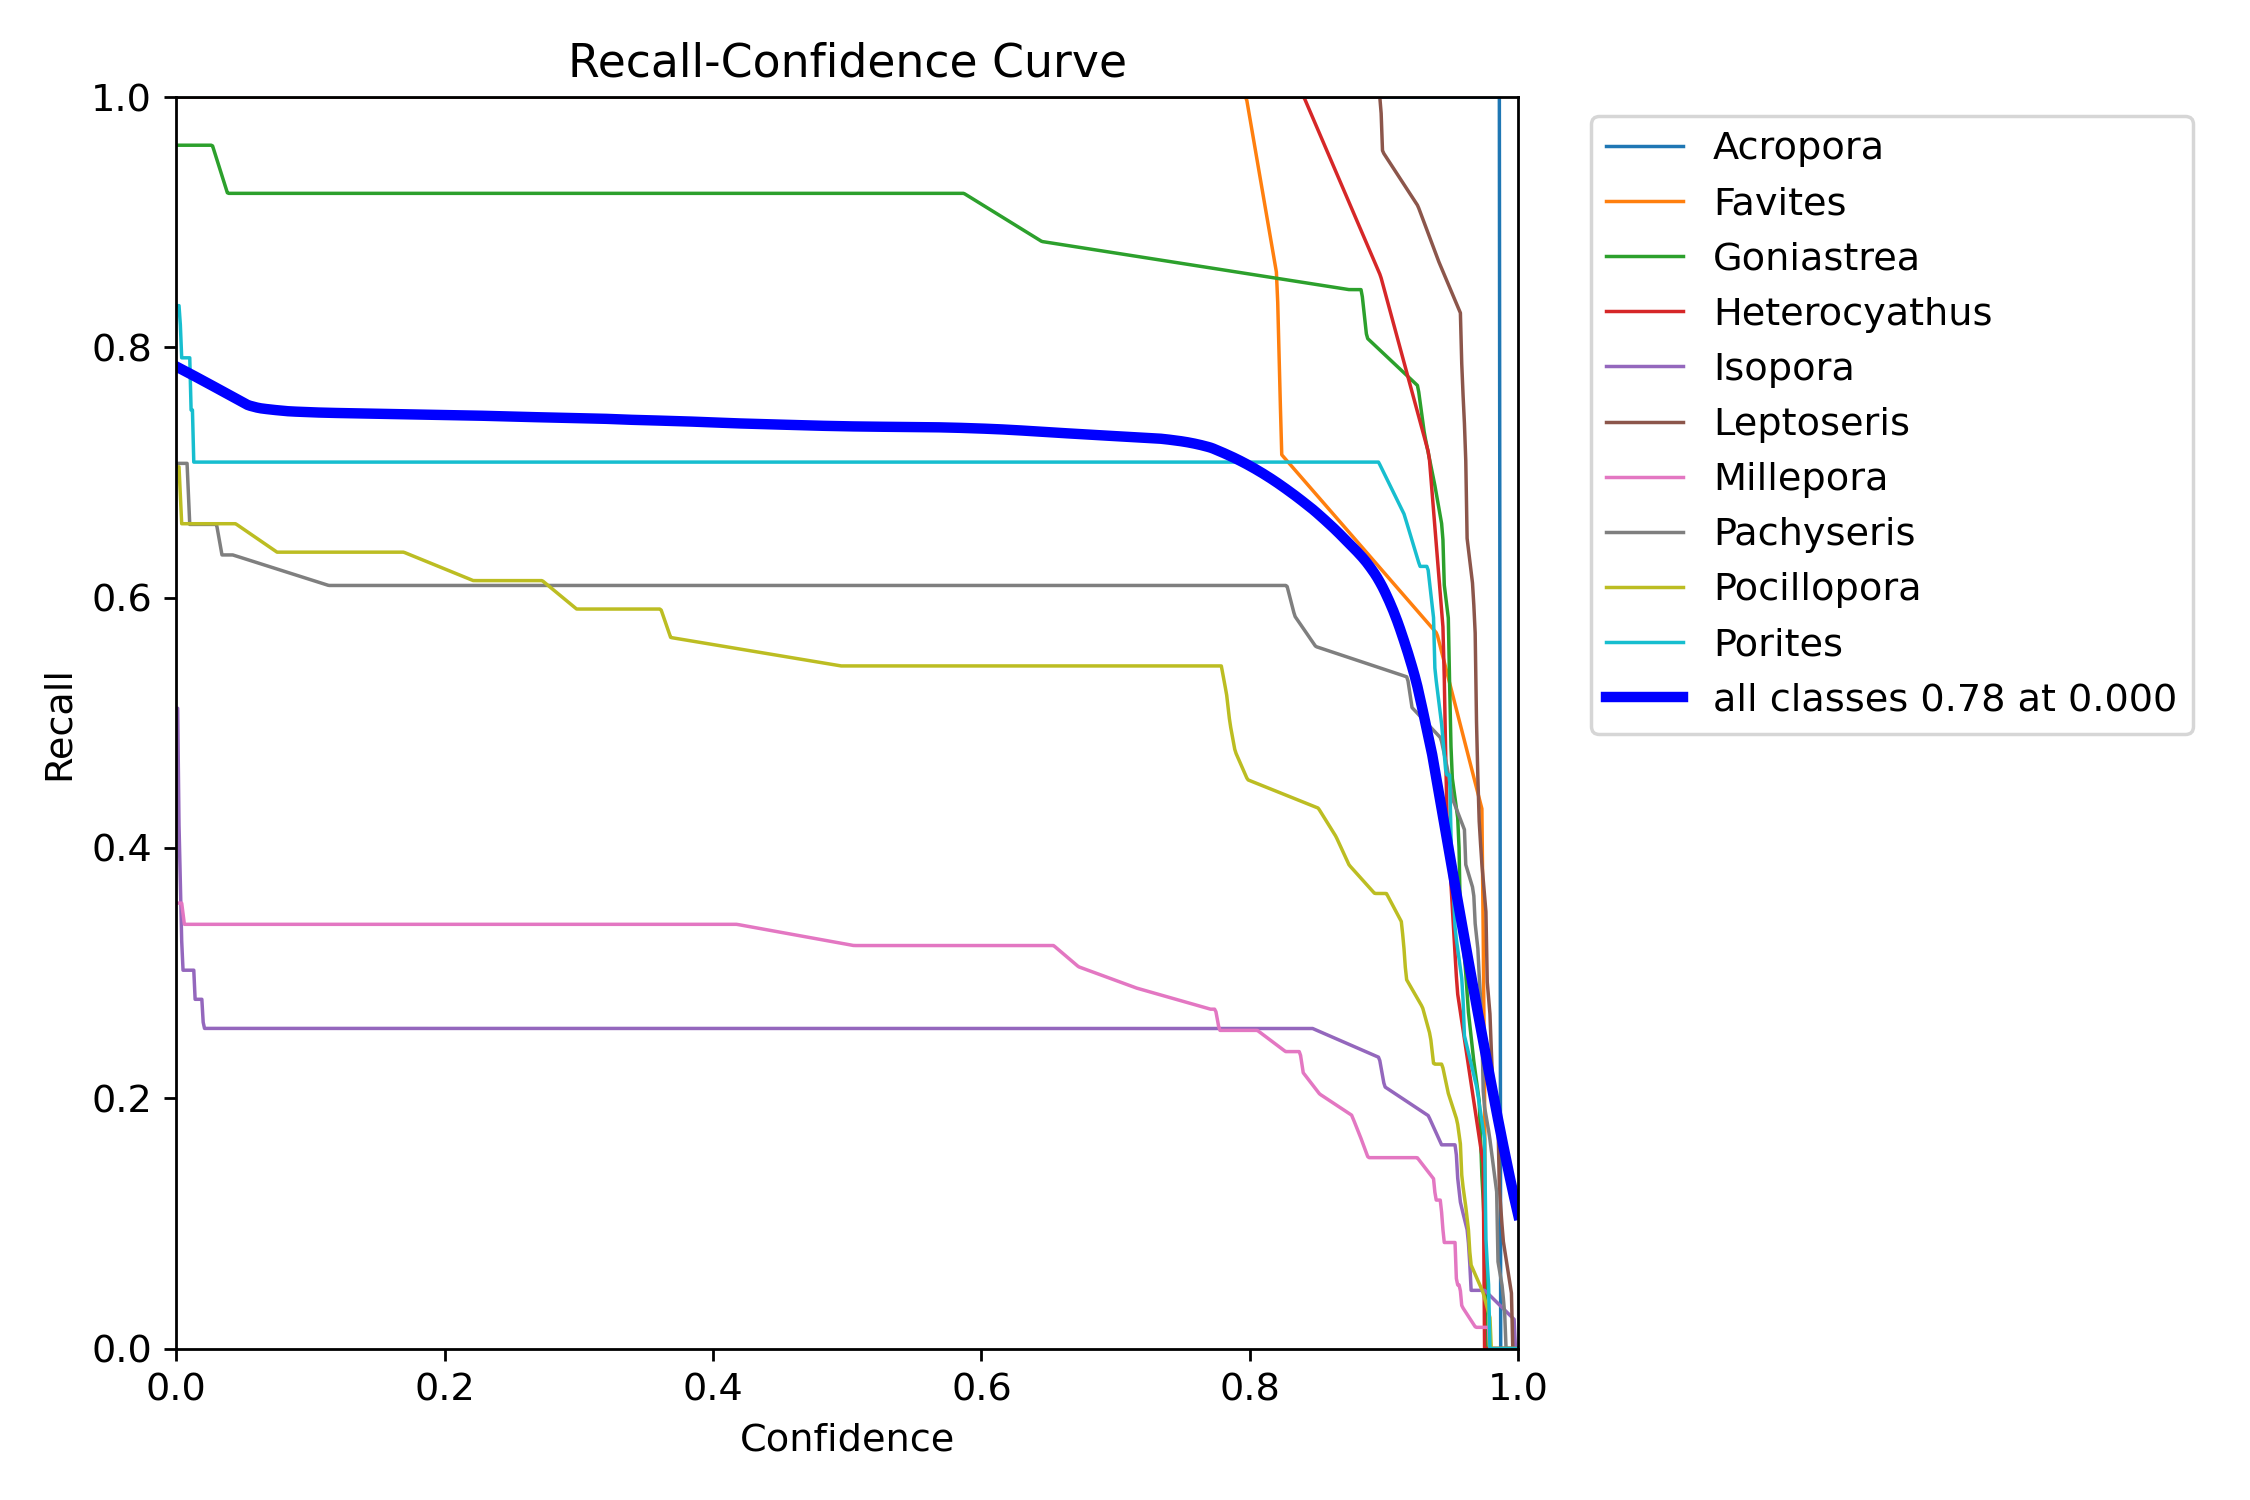

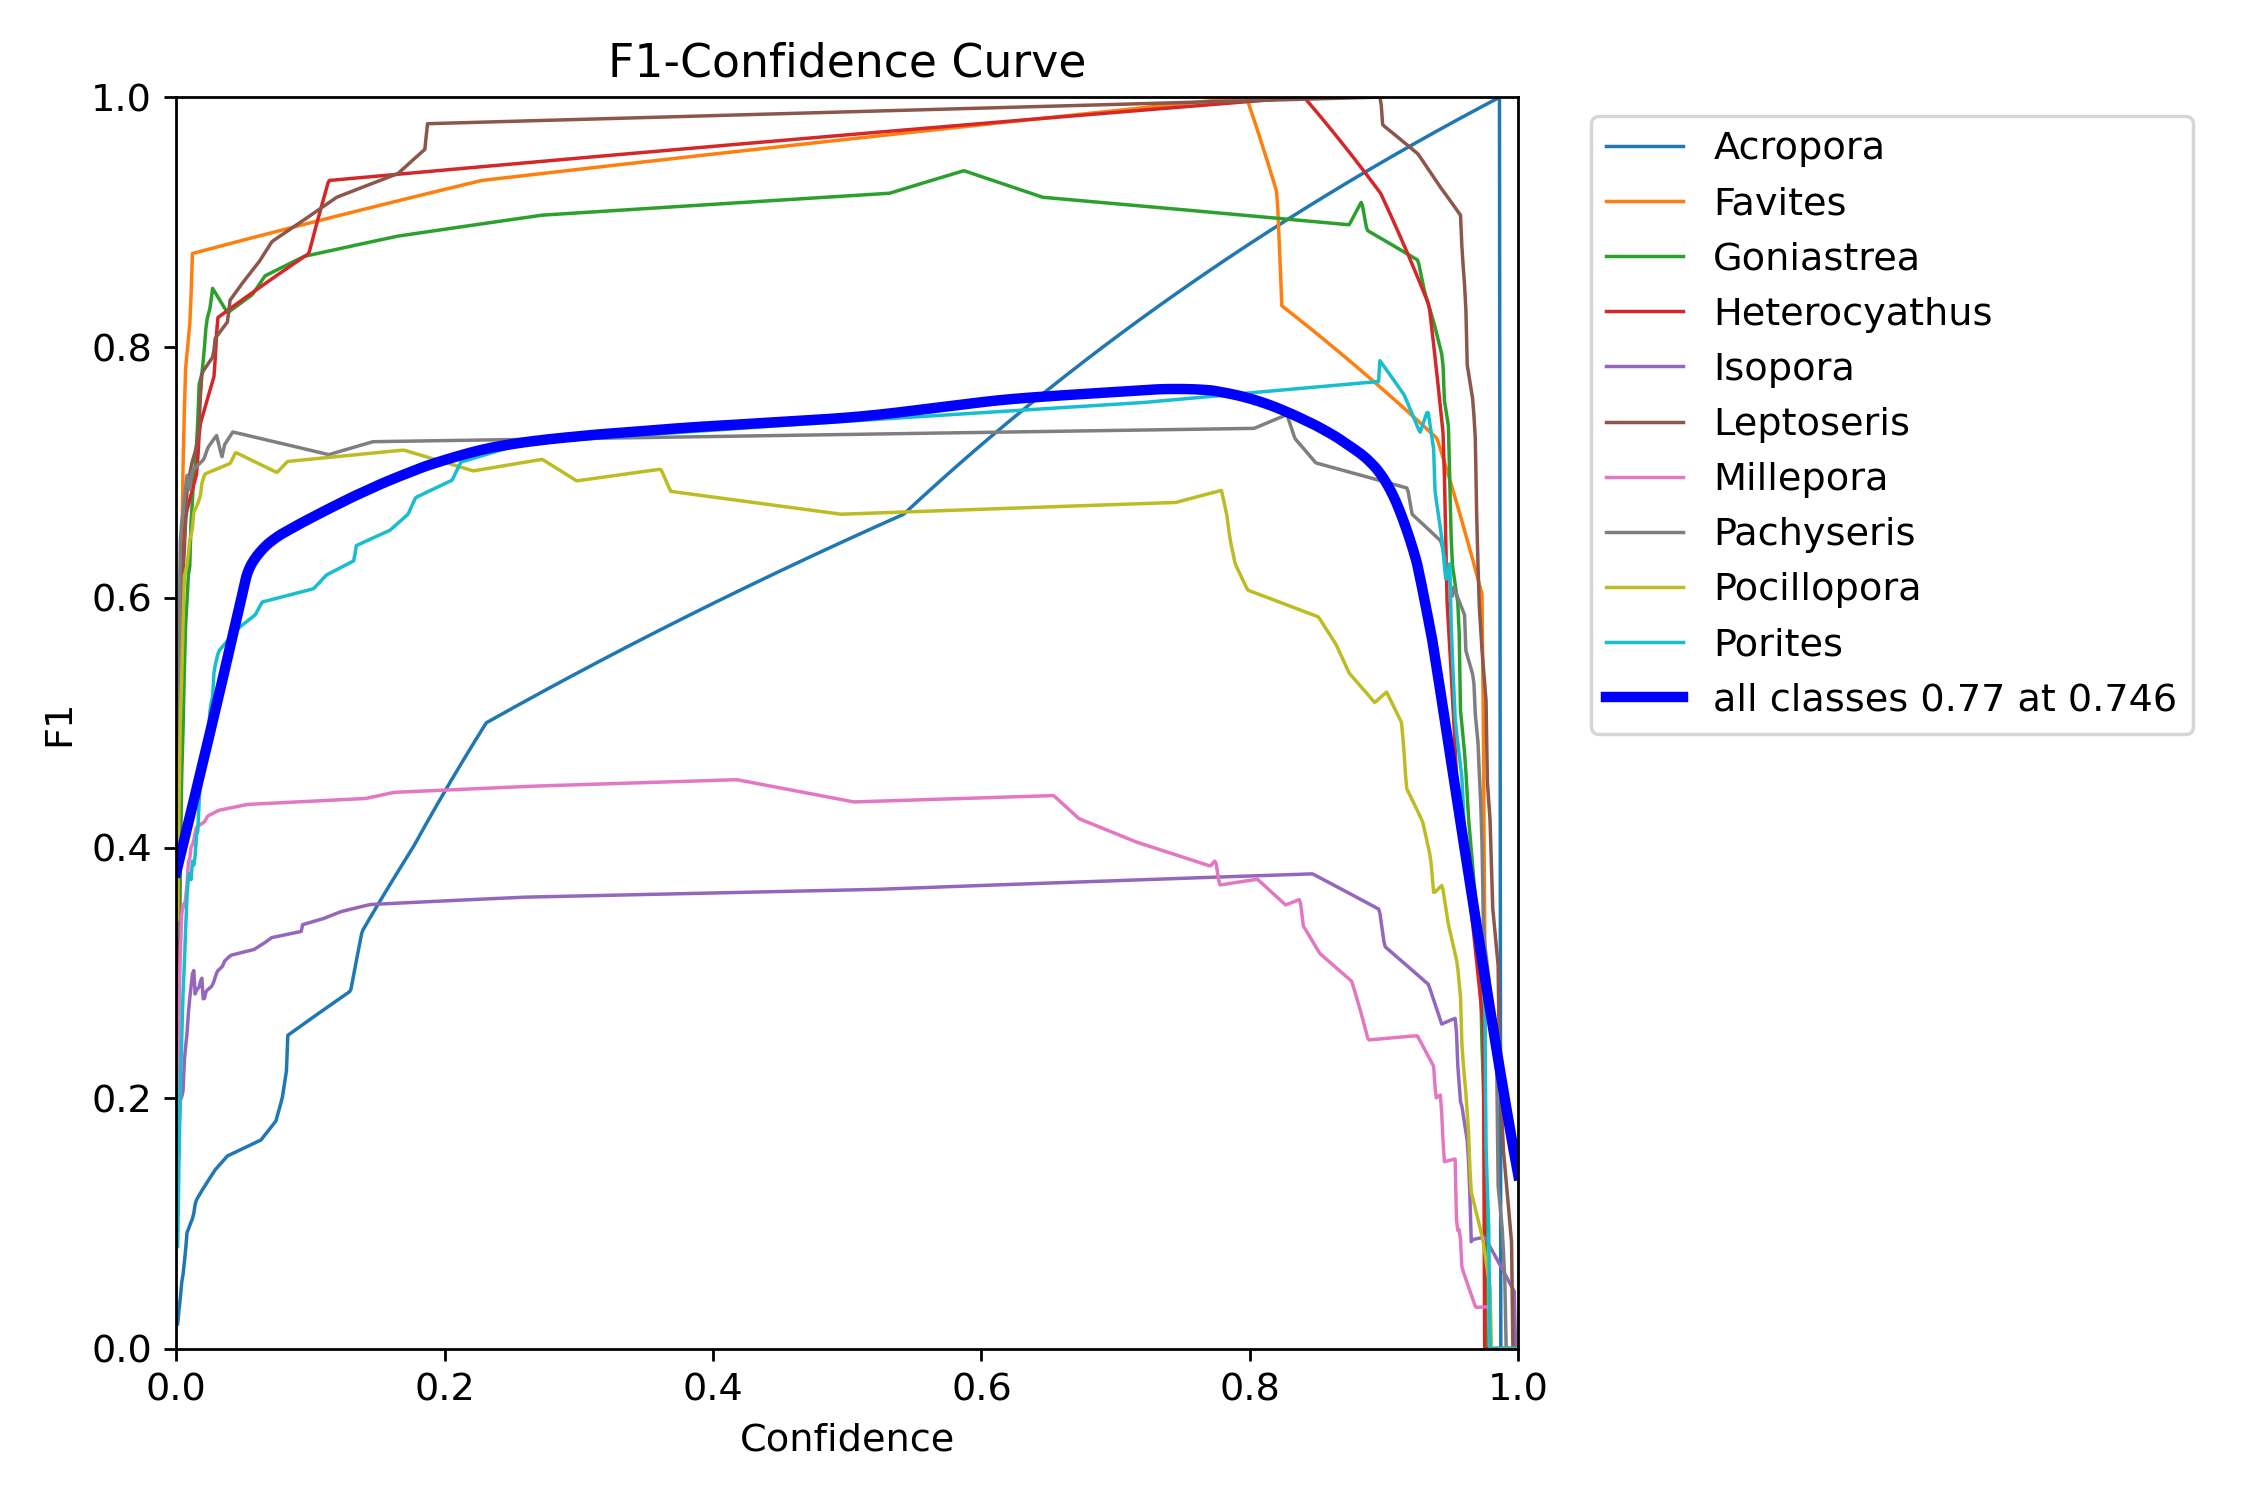

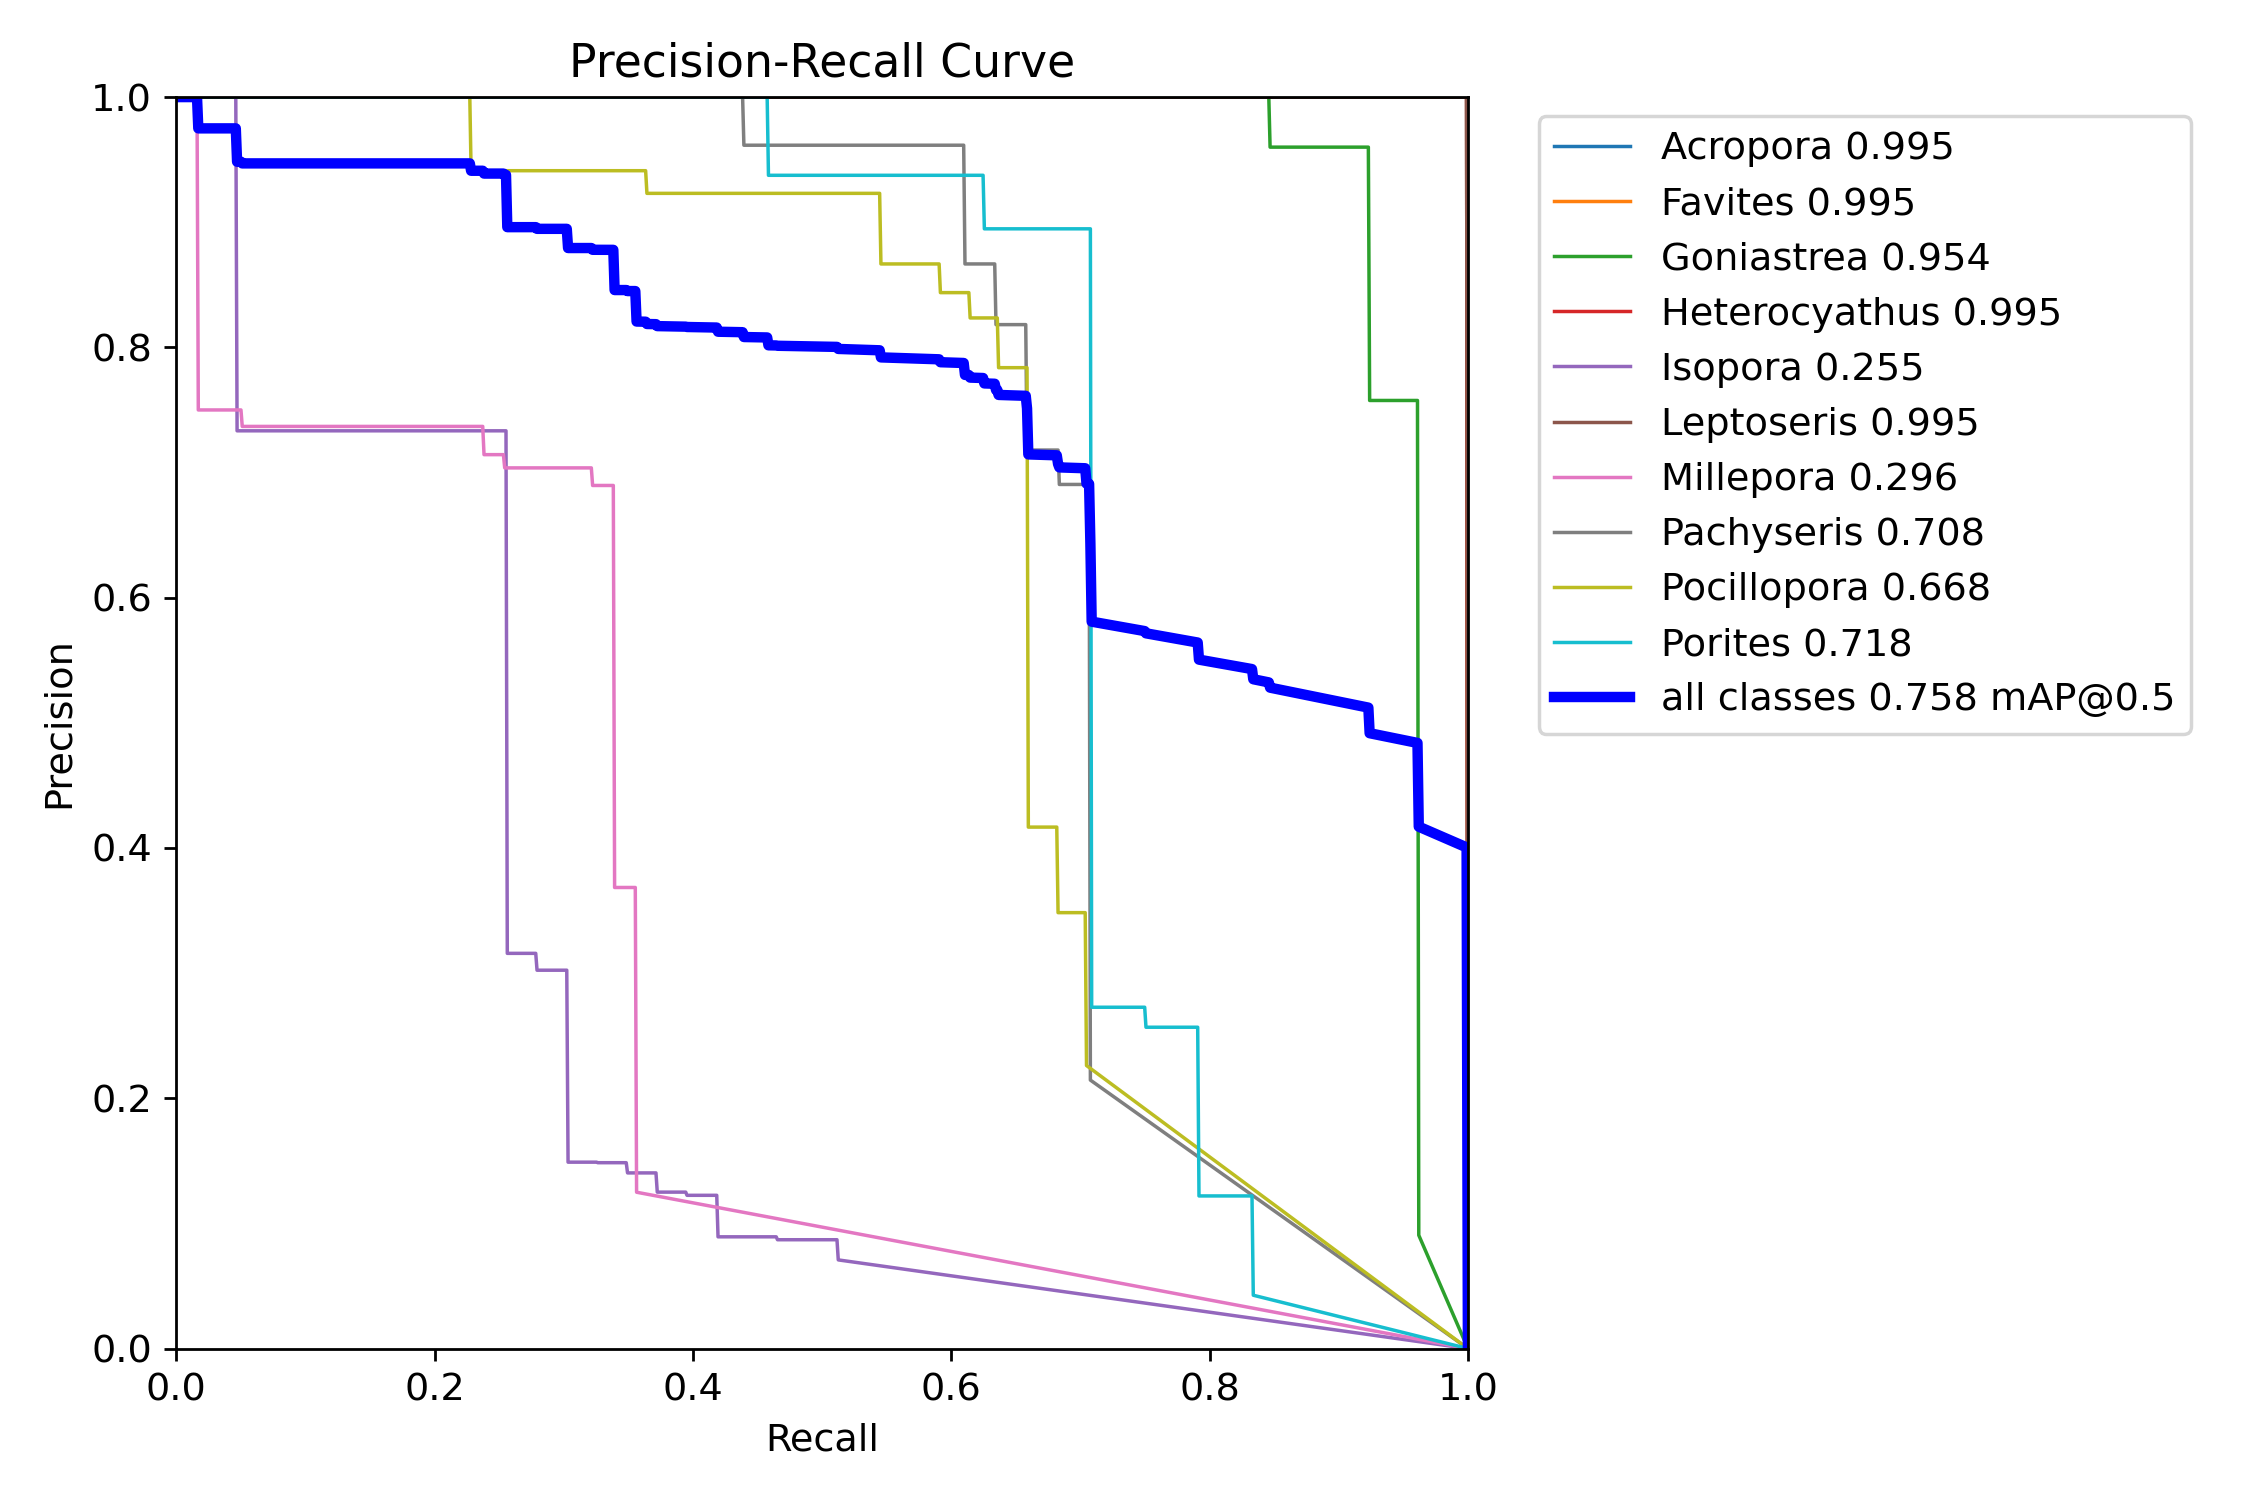

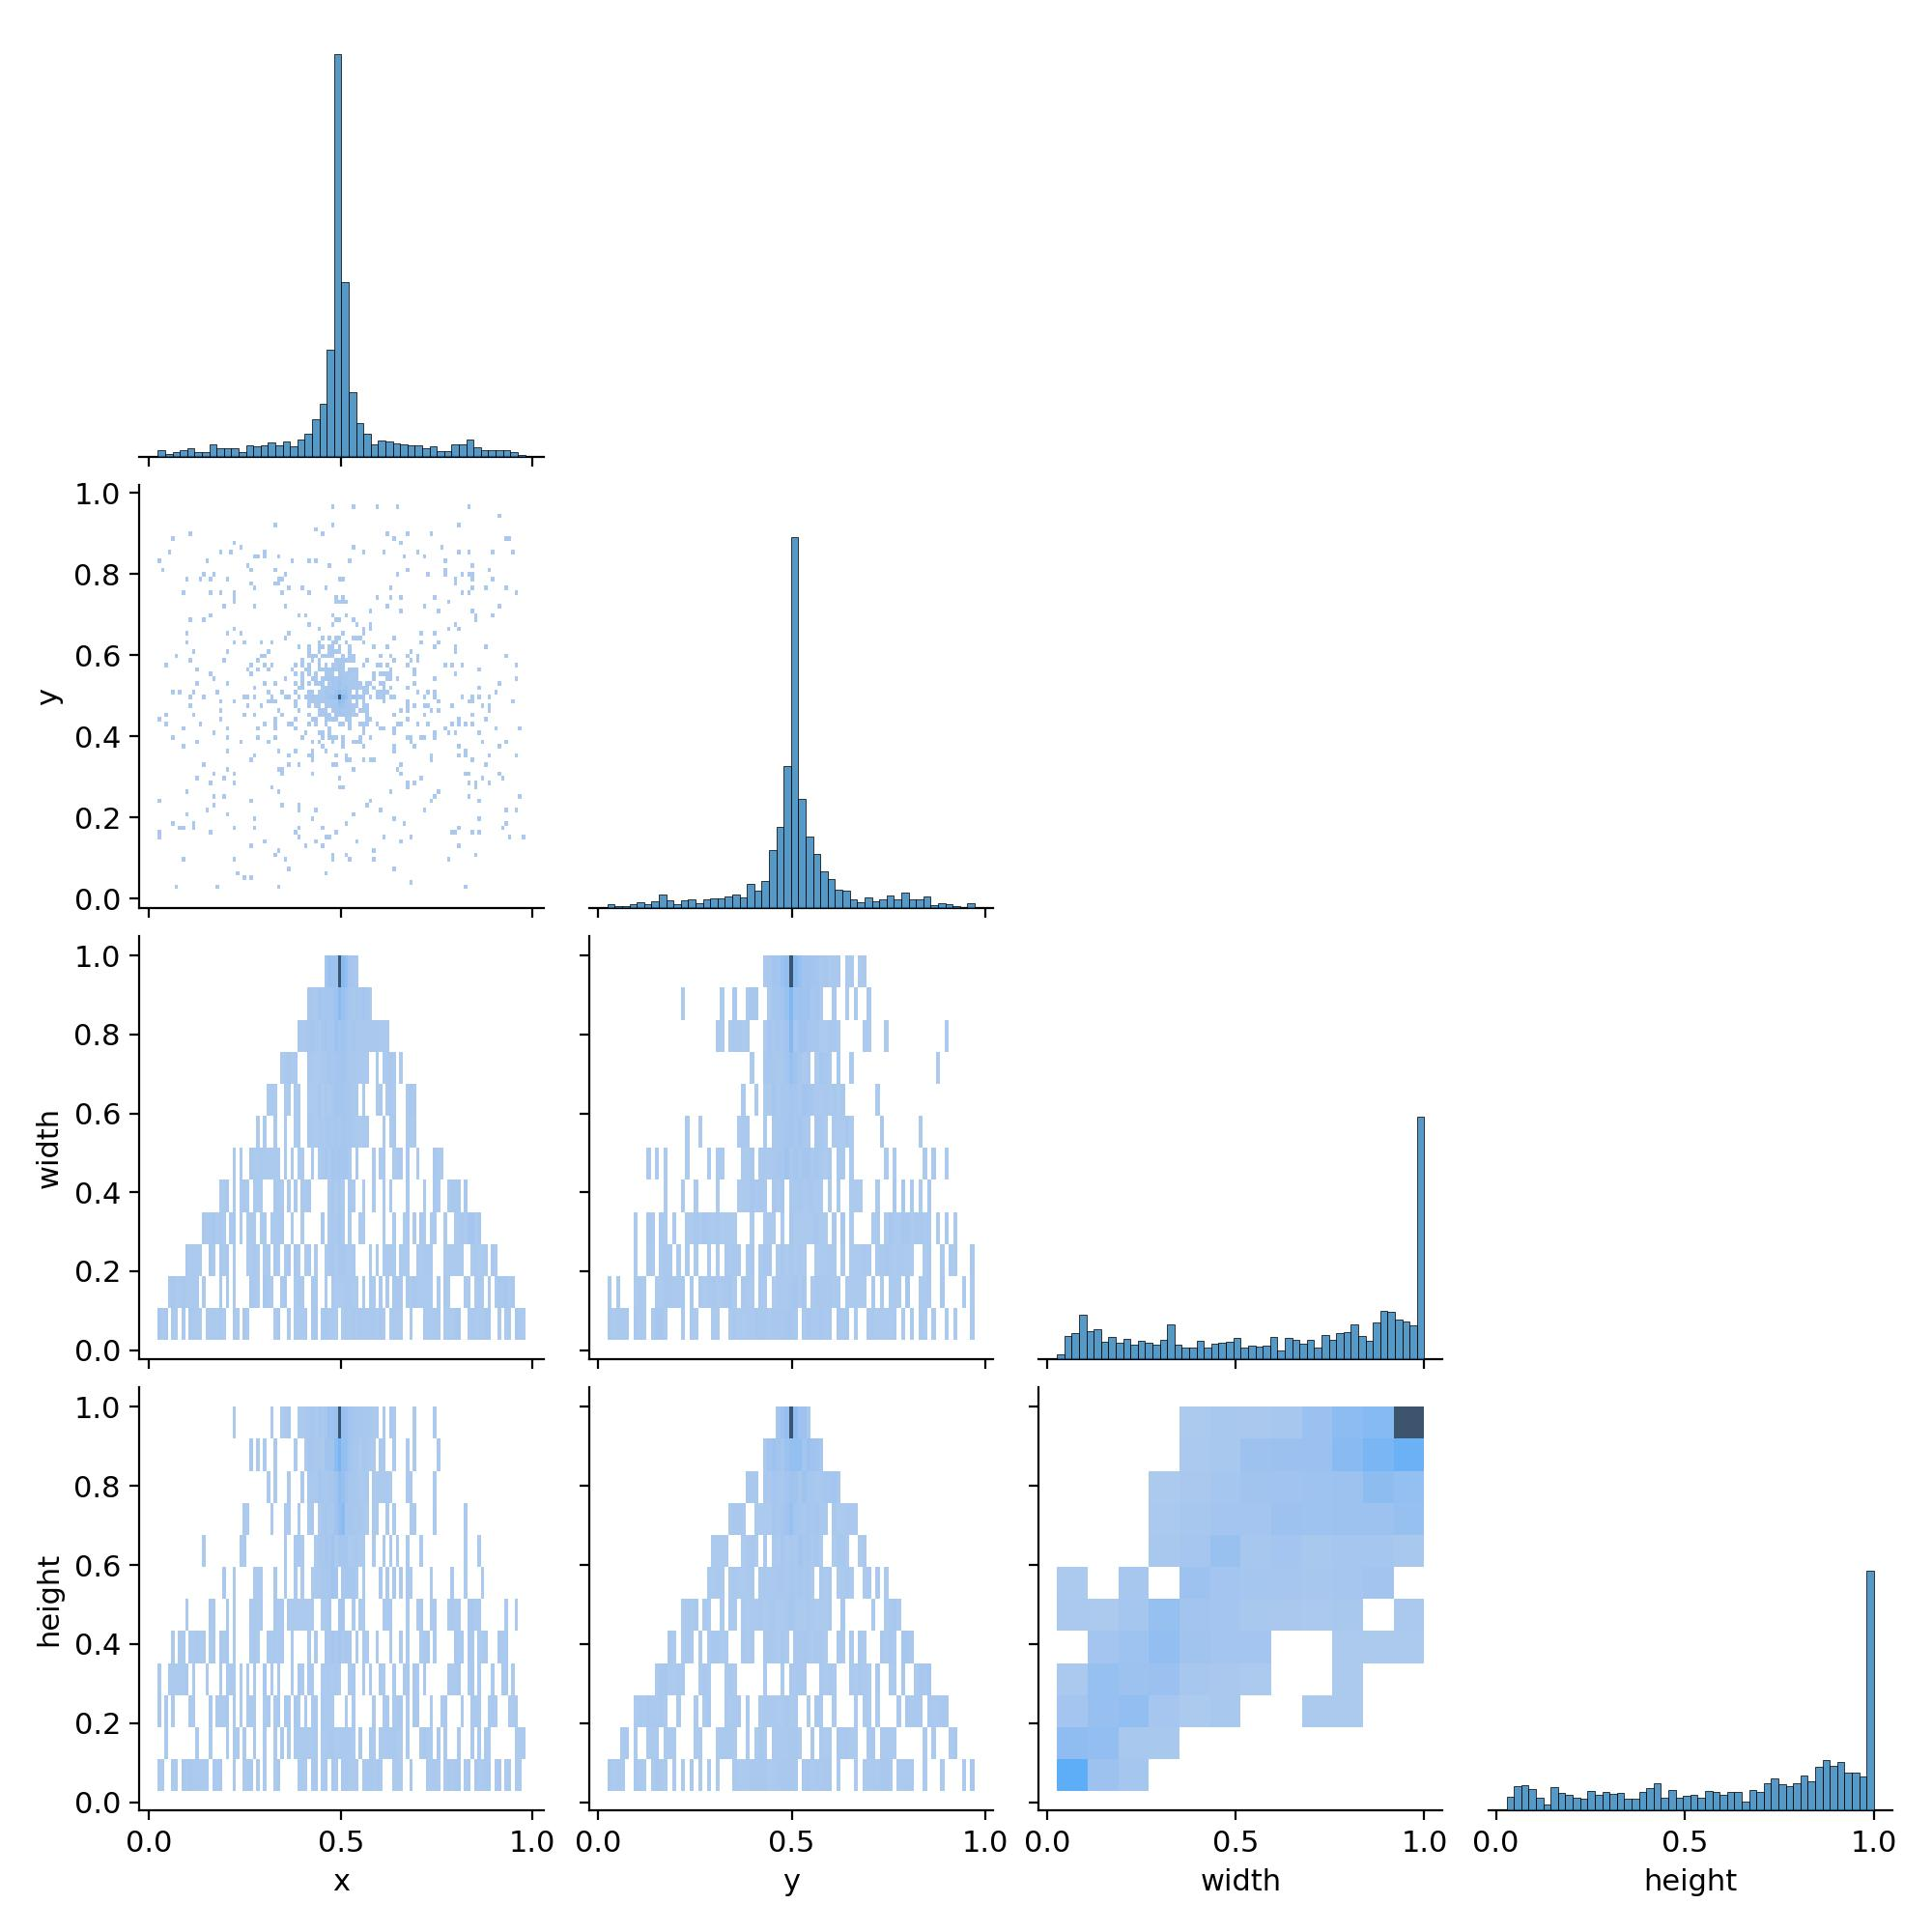

In [10]:
plot_paths = [
    "runs/segment/train/results.png",
    "runs/segment/train/MaskP_curve.png",
    "runs/segment/train/MaskR_curve.png",
    "runs/segment/train/MaskF1_curve.png",
    "runs/segment/train/MaskPR_curve.png",
    "runs/segment/train/labels_correlogram.jpg"
]

for path in plot_paths:
    display(Image(filename=path, width=600))


In [11]:
metrics = model.val(data="/content/data.yaml", split='test', imgsz=640, batch=16)
print(metrics)

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2158.8±755.9 MB/s, size: 81.5 KB)


val: Scanning /content/test/labels... 153 images, 7 backgrounds, 0 corrupt: 100%|██████████| 153/153 [00:00<00:00, 1654.02it/s]

val: New cache created: /content/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/10 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


                   all        153        218      0.886      0.842      0.871      0.819      0.886      0.842       0.87      0.789
          Acanthastrea         22         26      0.956          1      0.958      0.923      0.956          1      0.958      0.915
              Acropora         26         42      0.712      0.529       0.53      0.455      0.712      0.529       0.53      0.436
            Coeloseris         10         10      0.897          1      0.995      0.995      0.897          1      0.995      0.995
             Euphyllia         27         64          1      0.217      0.531      0.428          1      0.217      0.525      0.402
                 Favia         17         19      0.989          1      0.995      0.958      0.989          1      0.995      0.929
               Favites         18         23      0.916      0.953      0.935      0.827      0.916      0.953      0.935      0.698
          Sandalolitha          2          2      0.649          1   